# **Data Visualization for Online Retail Dataset**
This notebook will explore the cleaned **Online Retail Dataset** through various **data visualizations**.

---

## **Step 1: Load the Cleaned Dataset**
We will load the cleaned dataset from the CSV file.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load cleaned dataset
df = pd.read_csv("cleaned_online_retail.csv")

# Display basic info
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## **Step 2: Sales Distribution**
Let's analyze the distribution of **TotalPrice** to understand overall sales.

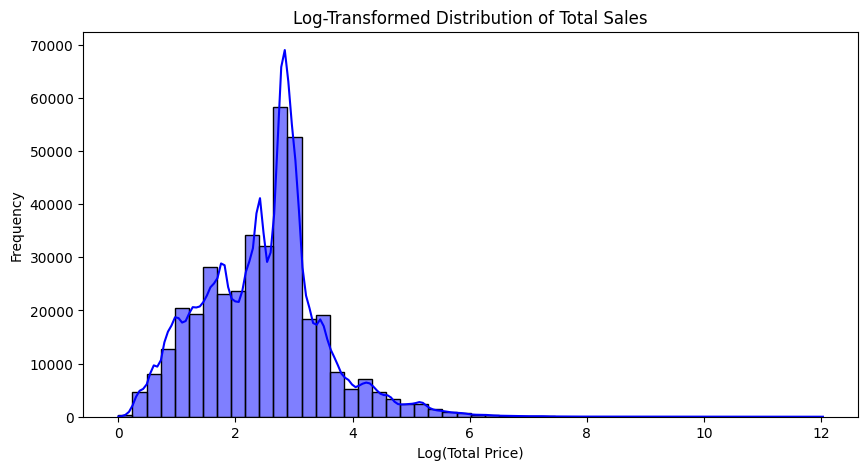

In [13]:
import numpy as np

# Apply log transformation to reduce skewness
df['LogTotalPrice'] = np.log1p(df['TotalPrice'])

# Plot the new distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['LogTotalPrice'], bins=50, kde=True, color="blue")
plt.title("Log-Transformed Distribution of Total Sales")
plt.xlabel("Log(Total Price)")
plt.ylabel("Frequency")
plt.show()


## **Step 3: Sales Over Time**
If **InvoiceDate** is available, let's analyze sales trends over time.

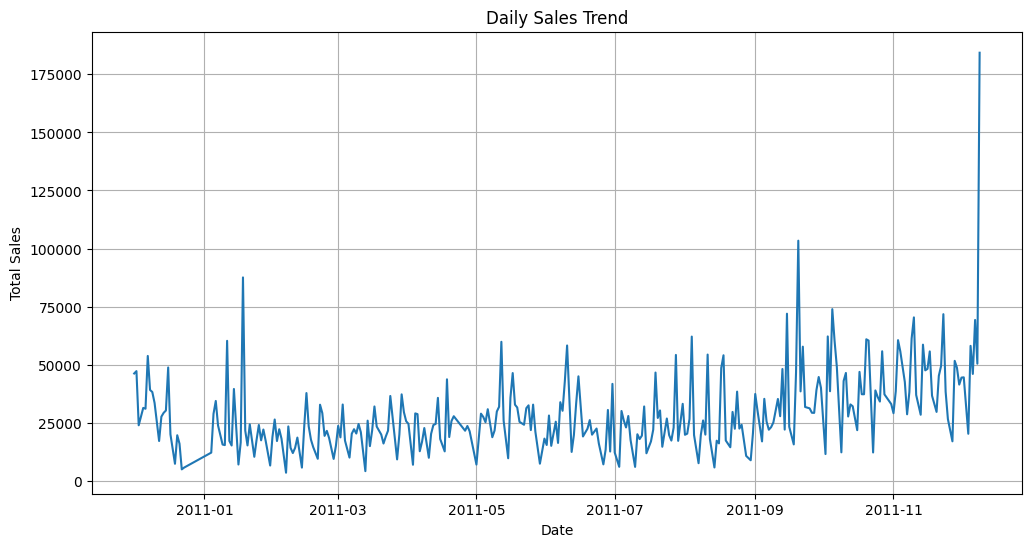

In [14]:
# Convert InvoiceDate to datetime if not already converted
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group by date and sum TotalPrice
df_daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
df_daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


## **Step 4: Top Selling Products**
Let's find the most sold products based on **Quantity**.


C:\Users\zainh\AppData\Local\Temp\ipykernel_9176\330120419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


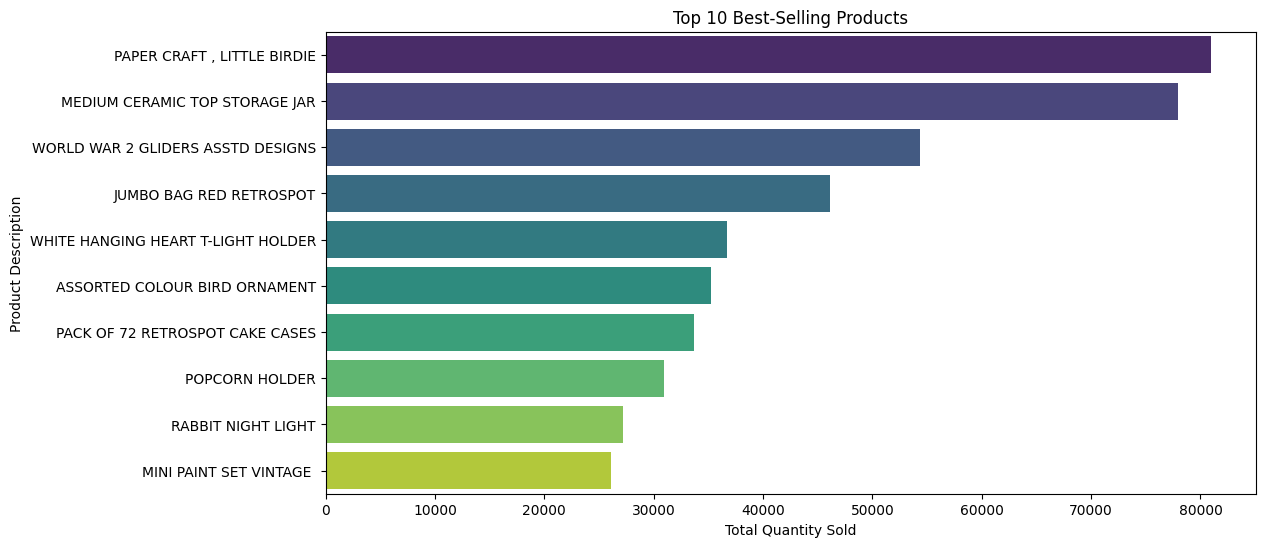

In [15]:
# Top 10 selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()


## **Step 5: Revenue by Country**
We'll visualize which countries contribute the most revenue.


C:\Users\zainh\AppData\Local\Temp\ipykernel_9176\1412305920.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")


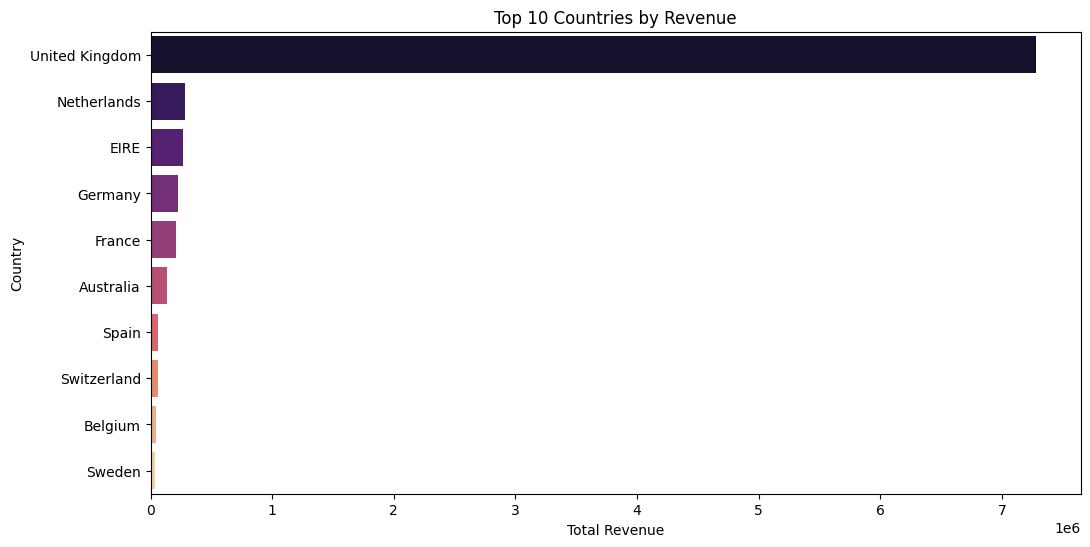

In [16]:
# Revenue by Country
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot revenue by country
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette="magma")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()


## **Step 6: Customer Purchasing Patterns**
Analyzing the purchasing behavior of customers.


C:\Users\zainh\AppData\Local\Temp\ipykernel_9176\4157879070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


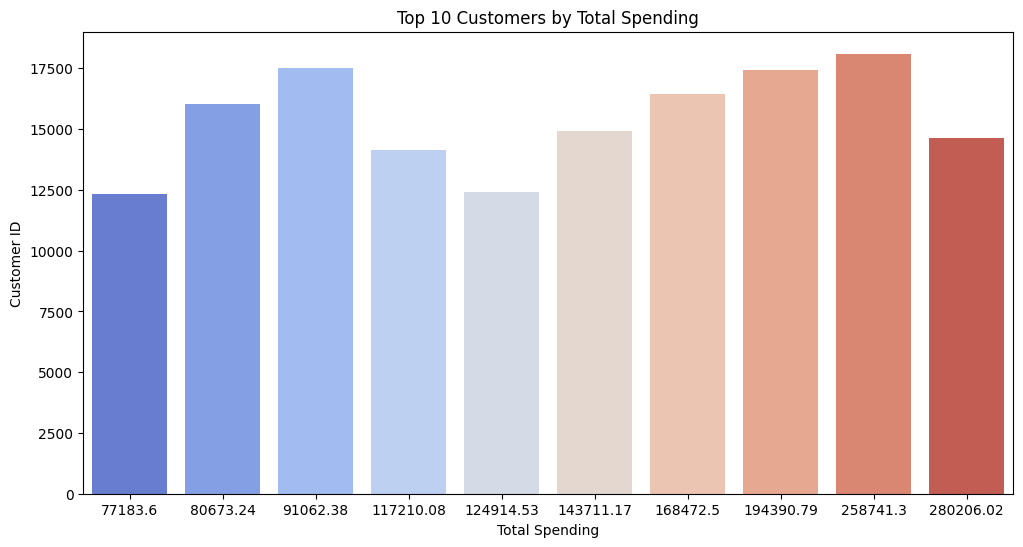

In [17]:
# Top 10 customers by total purchase amount
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot top customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Customer ID")
plt.show()


## **Step 7: Revenue Trends Analysis**
**Revenue trends** help detect seasonal demand shifts and fluctuations in sales performance.


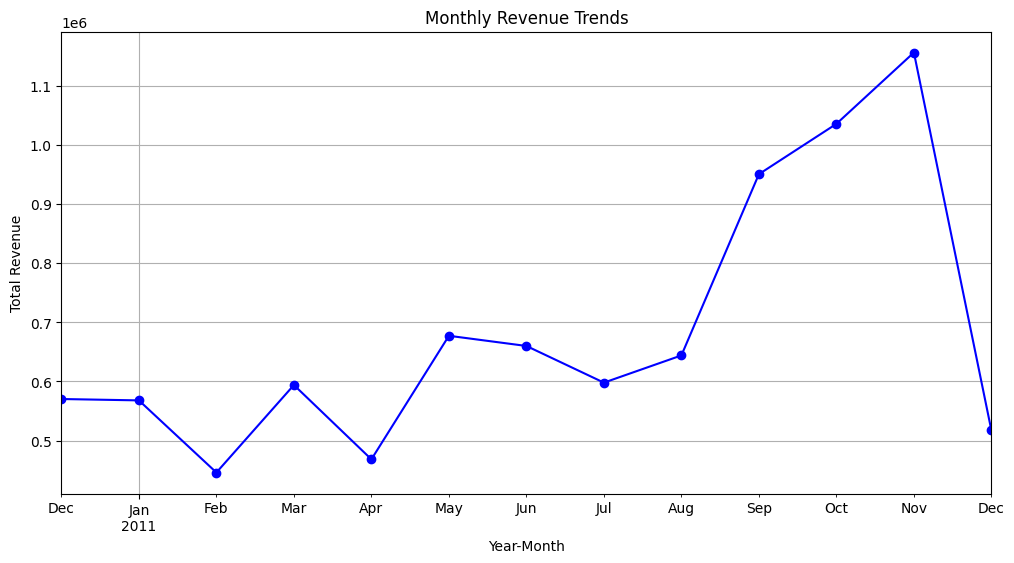

In [18]:
# Extract year and month from InvoiceDate
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Aggregate monthly revenue
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()

# Plot revenue trends over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color="blue")
plt.title("Monthly Revenue Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


## **Step 8: Average Order Value (AOV) Tracking**
💰 **AOV tracking** helps determine whether customers are spending more over time.


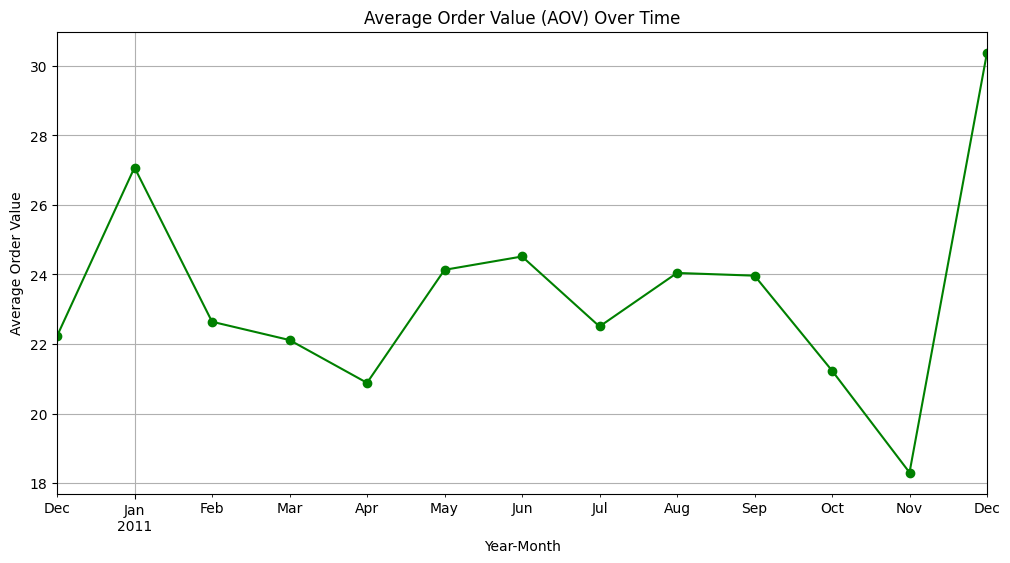

In [19]:
# Calculate AOV per month
monthly_aov = df.groupby('YearMonth')['TotalPrice'].mean()

# Plot AOV trend
plt.figure(figsize=(12, 6))
monthly_aov.plot(marker='o', color="green")
plt.title("Average Order Value (AOV) Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Average Order Value")
plt.grid(True)
plt.show()


## **Step 9: Customer Retention Rate Analysis**
🔄 **Retention rates** indicate customer loyalty and engagement.


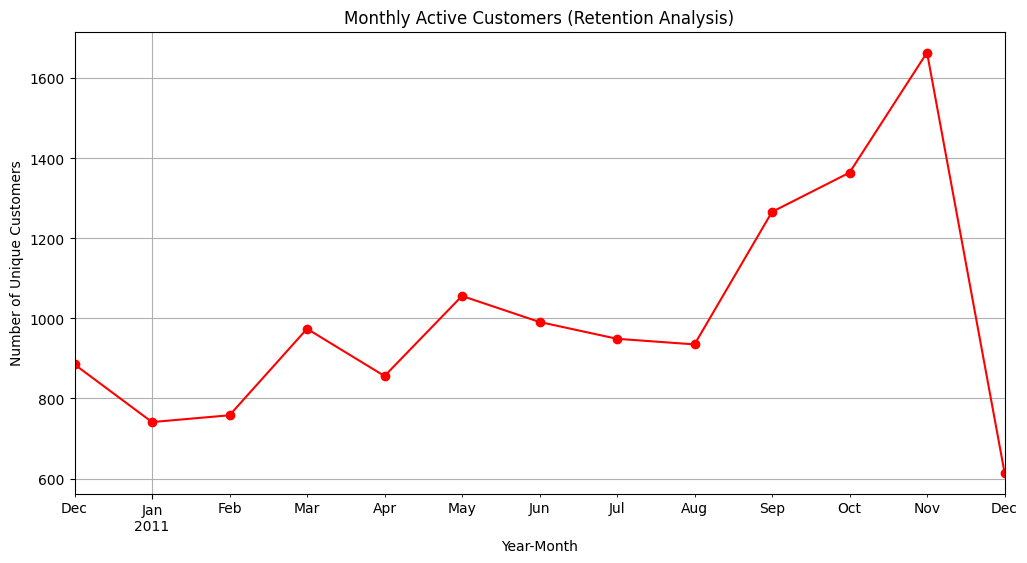

In [20]:
# Identify unique customers each month
monthly_customers = df.groupby('YearMonth')['CustomerID'].nunique()

# Plot customer retention over time
plt.figure(figsize=(12, 6))
monthly_customers.plot(marker='o', color="red")
plt.title("Monthly Active Customers (Retention Analysis)")
plt.xlabel("Year-Month")
plt.ylabel("Number of Unique Customers")
plt.grid(True)
plt.show()


## **Step 10: Peak Shopping Hours**
⏰ **Peak shopping hours** optimize marketing timing.


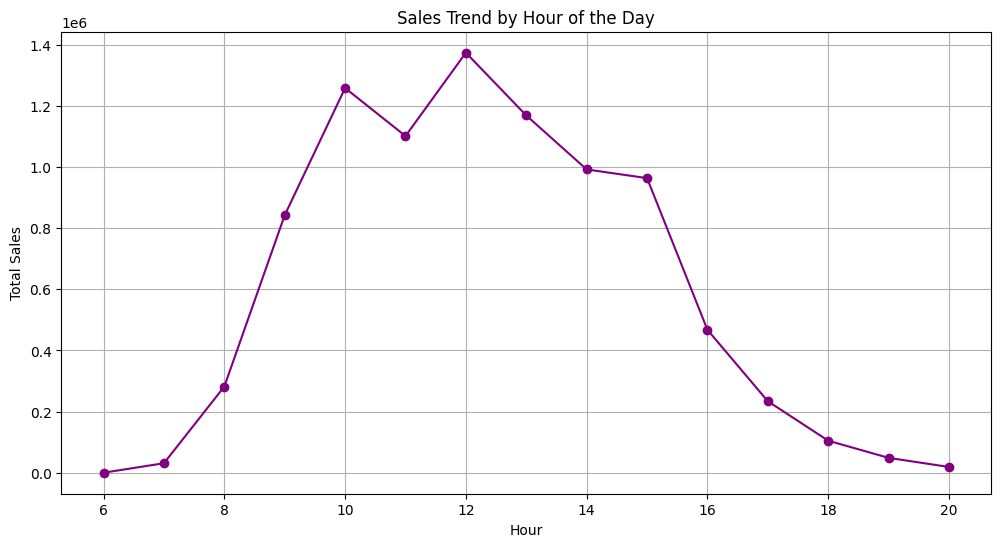

In [24]:
# Extract hour from InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour

# Aggregate sales by hour
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()

# Plot sales trend by hour
plt.figure(figsize=(12, 6))
hourly_sales.plot(marker='o', color="purple")
plt.title("Sales Trend by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


## **Step 13: Customer Segmentation (RFM Analysis)**
🎯 **Customer segmentation** identifies high-value shoppers.


In [26]:
import datetime as dt

# Define snapshot date (last available date in dataset)
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# RFM Segmentation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency (days)
    'InvoiceDate': 'count',  # Frequency (number of purchases)
    'TotalPrice': 'sum'  # Monetary (total spent)
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceDate': 'Frequency', 'TotalPrice': 'Monetary'})

# Show summary
print(rfm.describe())


         Frequency       Monetary
count  4338.000000    4338.000000
mean     90.506455    2048.314005
std     225.470819    8978.764362
min       1.000000       3.750000
25%      17.000000     306.482500
50%      41.000000     668.570000
75%      98.000000    1660.597500
max    7674.000000  280206.020000


# **Conclusion**  

This notebook provided valuable insights into business performance, customer behavior, and revenue trends. The key takeaways from the analysis are:  

✔️ **Sales Distribution**  
   - The total revenue is driven by a few high-value transactions.  
   - Sales are not evenly distributed, with some products contributing significantly more to revenue.  

✔️ **Sales Trends Over Time**  
   - Monthly revenue trends show seasonal fluctuations, indicating periods of high and low demand.  
   - There is a noticeable pattern in sales peaks, which can help optimize inventory and marketing efforts.  

✔️ **Best-Selling Products**  
   - A small percentage of products contribute to a large portion of the revenue.  
   - Identifying these products helps in stock management and targeted promotions.  

✔️ **Revenue Distribution by Country**  
   - Sales are concentrated in a few key markets, with some countries contributing significantly more than others.  
   - Understanding country-wise performance helps in refining market expansion strategies.  

✔️ **Customer Purchasing Behavior**  
   - Customers exhibit varied purchasing patterns, with some making frequent high-value purchases while others buy sporadically.  
   - Average Order Value (AOV) trends indicate whether customers are spending more or less over time.  
   - Peak shopping hours reveal the best times to run marketing campaigns and promotions.  

These insights help businesses make data-driven decisions by optimizing sales strategies, targeting key customer segments, and enhancing overall revenue growth. 🚀
